In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

[[[163. 161. 166.]
  [170. 168. 173.]
  [173. 171. 176.]
  ...
  [190. 187. 194.]
  [192. 189. 196.]
  [194. 191. 198.]]

 [[180. 178. 183.]
  [173. 171. 176.]
  [163. 161. 166.]
  ...
  [190. 187. 194.]
  [191. 188. 195.]
  [193. 190. 197.]]

 [[177. 175. 180.]
  [171. 169. 174.]
  [171. 169. 174.]
  ...
  [191. 188. 195.]
  [192. 189. 196.]
  [193. 190. 197.]]

 ...

 [[119. 116. 127.]
  [131. 128. 139.]
  [121. 118. 129.]
  ...
  [166. 164. 177.]
  [167. 165. 178.]
  [167. 165. 178.]]

 [[101.  98. 109.]
  [146. 143. 154.]
  [128. 125. 136.]
  ...
  [163. 161. 174.]
  [164. 162. 175.]
  [164. 162. 175.]]

 [[125. 122. 133.]
  [113. 110. 121.]
  [143. 140. 151.]
  ...
  [161. 159. 172.]
  [161. 159. 172.]
  [162. 160. 173.]]]
(256, 256, 3)
(32, 256, 256, 3)
[0 1 1 2 2 0 1 1 0 0 0 1 0 0 0 0 0 0 2 0 1 0 1 0 1 1 0 1 1 0 1 1]


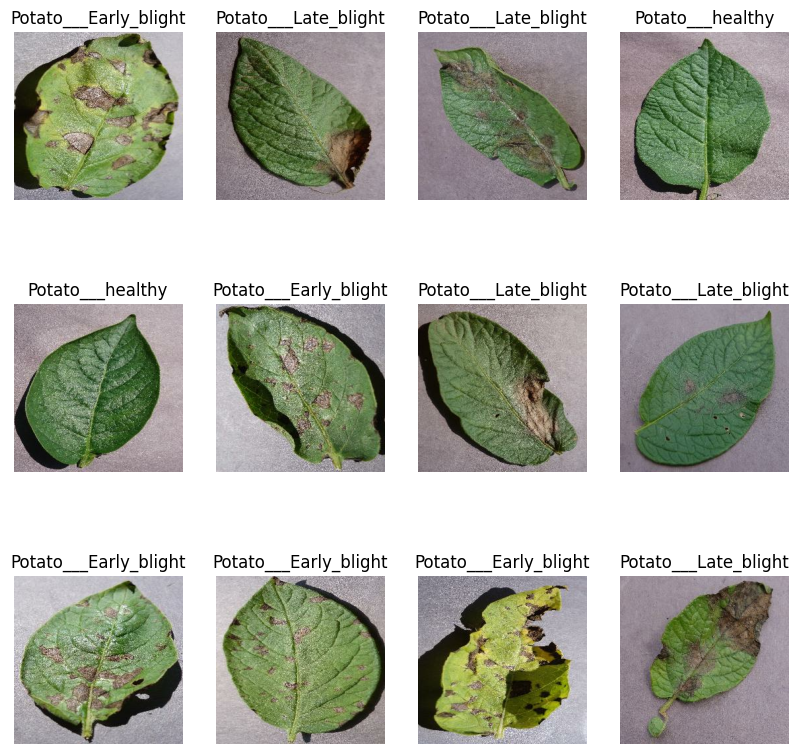

In [6]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    print(image_batch[0].numpy())
    print(image_batch[0].shape)
    print(image_batch.shape)
    print(label_batch.numpy())

In [7]:
len(dataset)

68

In [8]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [9]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split= 0.1, shuffle=True, shuffle_size = 10000 ):
    ds_size = len(ds)
    if shuffle :
        ds = ds.shuffle(shuffle_size, seed= 12 )
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size )
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds
   

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [27]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:
len(test_ds)

8

In [30]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [39]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0/255)
])

In [41]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])